In [7]:
%matplotlib inline
import sys,os
from numpy import array, double, arange, random
try:
    import matk
except:
    try:
        sys.path.append(os.path.join('..','src'))
        import matk
    except ImportError as err:
        print 'Unable to load MATK module: '+str(err)
from multiprocessing import freeze_support

# Define basic function
def f(pars):
    a = pars['a'] 
    c = pars['c'] 
    m=double(arange(20))
    m=a*(m**2)+c
    return m
    

# Create matk object
prob = matk.matk(model=f)

# Add parameters with 'true' parameters
prob.add_par('a', min=0, max=10, value=2)
prob.add_par('c', min=0, max=30, value=5)

# Run model using 'true' parameters
prob.forward()

# Create 'true' observations with zero mean, 0.5 st. dev. gaussian noise added
prob.obsvalues = prob.simvalues + random.normal(0,0.1,len(prob.simvalues))

# Run MCMC with 100000 samples burning (discarding) the first 10000
M = prob.MCMC(nruns=100000,burn=10000,verbose=False)

 [-----------------100%-----------------] 100000 of 100000 complete in 128.1 sec

Plotting error_std
Plotting c
Plotting a


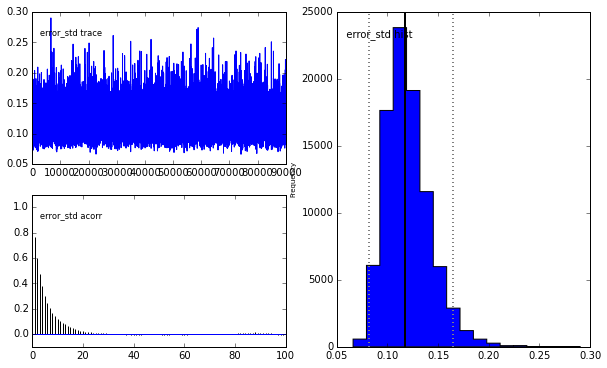

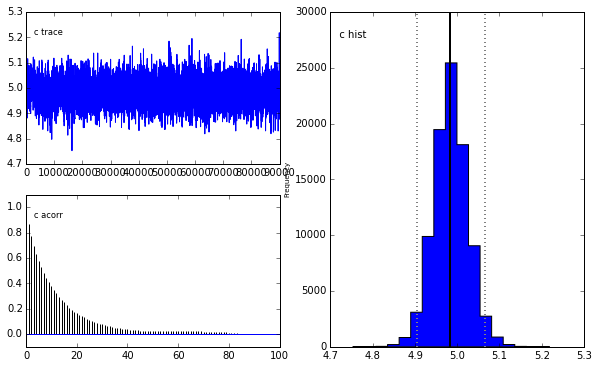

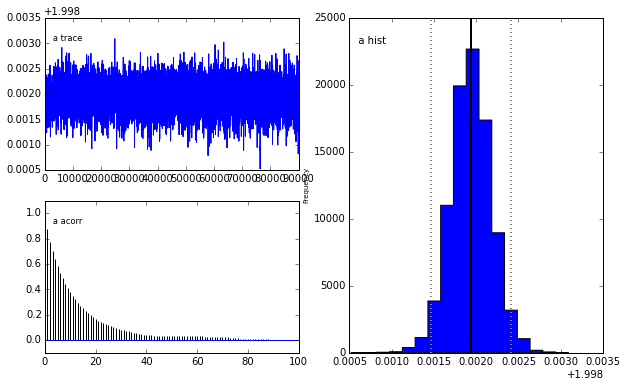

In [6]:
# Plot results, PNG files will be created in current directory
# It is apparent that the true parameter values and standard deviation
# are recovered as the most likely values.
prob.MCMCplot(M)